In [41]:
%matplotlib inline

from path import Path

import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

In [42]:
cereal = pd.read_csv('Cereals.csv')
cereal.set_index('name', inplace = True)
cereal.dropna(inplace = True)
cereal = cereal.iloc[:, 2:]

In [43]:
cereal.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,
100%_Bran,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
100%_Natural_Bran,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
All-Bran,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
All-Bran_with_Extra_Fiber,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
Apple_Cinnamon_Cheerios,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.0,0.75,29.509541


In [44]:
cereal.shape

(74, 13)

In [45]:
# scikit-learn uses population standard deviation
cereal_df_norm = cereal.apply(preprocessing.scale, axis=0)

# compute normalized distance based on Sales and Fuel Cost
d_norm = pairwise.pairwise_distances(cereal_df_norm, metric='euclidean')
pd.DataFrame(d_norm, columns=cereal.index, index=cereal.index).head(5)

name,100%_Bran,100%_Natural_Bran,All-Bran,All-Bran_with_Extra_Fiber,Apple_Cinnamon_Cheerios,Apple_Jacks,Basic_4,Bran_Chex,Bran_Flakes,Cap'n'Crunch,...,Special_K,Strawberry_Fruit_Wheats,Total_Corn_Flakes,Total_Raisin_Bran,Total_Whole_Grain,Triples,Trix,Wheat_Chex,Wheaties,Wheaties_Honey_Gold
name,,,,,,,,,,,,,,,,,,,,,
100%_Bran,0.000000,7.545591,1.931841,3.414085,7.078209,7.555426,7.360148,5.735218,4.173751,8.296163,...,7.623938,6.328777,8.916020,8.332777,6.991537,7.875975,8.170772,6.204149,6.620169,7.404315
100%_Natural_Bran,7.545591,0.000000,7.803870,10.046789,4.905484,5.965405,5.383080,6.225597,6.515009,5.342434,...,7.488654,6.211937,7.620178,7.783614,7.016529,6.505805,5.538087,6.425087,6.154273,6.007113
All-Bran,1.931841,7.803870,0.000000,4.058567,6.908322,7.611106,6.986007,5.468380,3.762740,7.981891,...,7.338796,6.726131,8.584944,8.005740,6.706241,7.343999,8.094109,5.776686,6.333002,7.113256
All-Bran_with_Extra_Fiber,3.414085,10.046789,4.058567,0.000000,9.569720,9.801933,9.490618,7.530684,5.965517,10.847041,...,9.058407,7.690977,10.440947,10.233966,8.466716,9.611344,10.417327,7.869945,8.058770,9.481927
Apple_Cinnamon_Cheerios,7.078209,4.905484,6.908322,9.569720,0.000000,2.890928,4.132865,2.843108,4.658420,2.123801,...,5.208031,4.405483,5.532192,6.473143,5.246449,4.296231,2.482267,3.312904,3.463504,1.894769


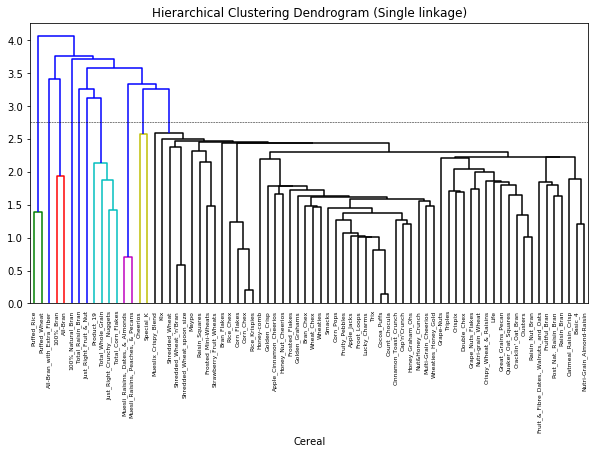

In [46]:
Z = linkage(cereal_df_norm, method='single')

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.23)
plt.title('Hierarchical Clustering Dendrogram (Single linkage)')
plt.xlabel('Cereal')
dendrogram(Z, labels=cereal_df_norm.index, color_threshold=2.75)
plt.axhline(y=2.75, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

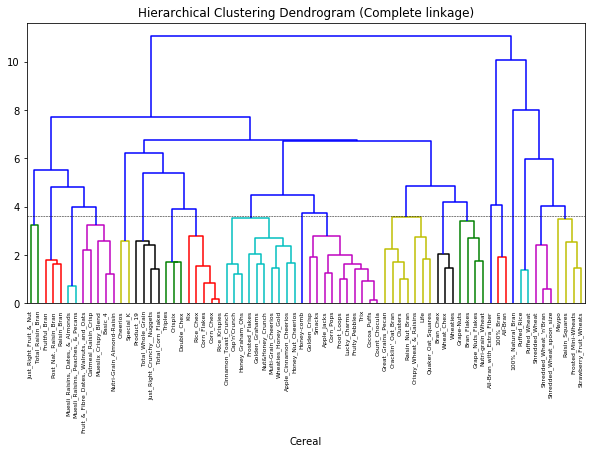

In [47]:
Z = linkage(cereal_df_norm, method='complete')

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.23)
plt.title('Hierarchical Clustering Dendrogram (Complete linkage)')
plt.xlabel('Cereal')
dendrogram(Z, labels=cereal_df_norm.index, color_threshold=3.6)
plt.axhline(y=3.6, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

Comment on the structure of the clusters

In [64]:
memb = fcluster(linkage(cereal_df_norm, 'single'), 10, criterion='maxclust')
memb = pd.Series(memb, index=cereal_df_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

1 :  Puffed_Rice, Puffed_Wheat
2 :  100%_Bran, All-Bran
3 :  All-Bran_with_Extra_Fiber
4 :  Just_Right_Crunchy__Nuggets, Product_19, Total_Corn_Flakes, Total_Whole_Grain
5 :  Just_Right_Fruit_&_Nut
6 :  Total_Raisin_Bran
7 :  Muesli_Raisins,_Dates,_&_Almonds, Muesli_Raisins,_Peaches,_&_Pecans
8 :  Cheerios, Special_K
9 :  Apple_Cinnamon_Cheerios, Apple_Jacks, Basic_4, Bran_Chex, Bran_Flakes, Cap'n'Crunch, Cinnamon_Toast_Crunch, Clusters, Cocoa_Puffs, Corn_Chex, Corn_Flakes, Corn_Pops, Count_Chocula, Cracklin'_Oat_Bran, Crispix, Crispy_Wheat_&_Raisins, Double_Chex, Froot_Loops, Frosted_Flakes, Frosted_Mini-Wheats, Fruit_&_Fibre_Dates,_Walnuts,_and_Oats, Fruitful_Bran, Fruity_Pebbles, Golden_Crisp, Golden_Grahams, Grape_Nuts_Flakes, Grape-Nuts, Great_Grains_Pecan, Honey_Graham_Ohs, Honey_Nut_Cheerios, Honey-comb, Kix, Life, Lucky_Charms, Maypo, Mueslix_Crispy_Blend, Multi-Grain_Cheerios, Nut&Honey_Crunch, Nutri-Grain_Almond-Raisin, Nutri-grain_Wheat, Oatmeal_Raisin_Crisp, Post_Nat._Raisi

In [66]:
#Compute the average values of each cluster members, using groupby() with the cluster centers followed by mean: 
cereal_df_norm.groupby(memb).mean()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
1,-2.893399,-0.948532,-1.000000,-1.975034,-0.696179,-0.835572,-1.641763,-0.937717,-1.312098,0.948401,-3.483573,0.761919,1.399648
2,-1.878652,1.391180,0.000000,0.396979,3.042976,-2.258493,-0.371425,2.862099,-0.183083,0.948401,-0.202203,-2.099895,1.545528
3,-2.893399,1.391180,-1.000000,-0.272050,4.912553,-1.741067,-1.641763,3.288247,-0.183083,0.948401,-0.202203,-1.373763,3.682812
4,-0.102846,-0.012647,-0.250000,0.731494,-0.384583,0.975417,-0.775624,-0.511569,3.203961,0.948401,-0.202203,0.761919,-0.106922
5,1.672960,0.455295,0.000000,0.092875,-0.072986,1.363486,0.436971,-0.049909,3.203961,0.948401,1.766618,-0.305922,-0.423306
6,1.672960,0.455295,0.000000,0.336159,0.757937,0.069922,1.591824,1.867755,3.203961,0.948401,3.079166,0.761919,-0.988552
7,2.180334,1.391180,2.000000,-0.484923,0.342475,0.328635,0.898912,1.015460,-0.183083,0.948401,-0.202203,0.761919,-0.483082
8,0.150841,3.262949,0.000000,1.187651,-0.280717,0.457992,-1.179822,-0.262983,-0.183083,-1.471657,-0.202203,1.295840,0.687042
9,0.072110,-0.222414,-0.068966,0.007936,-0.151781,0.047620,0.122373,-0.153997,-0.241481,-0.178178,0.078410,-0.074679,-0.129996
10,0.658214,0.455295,4.000000,-1.792572,-0.072986,-1.741067,0.206001,0.518288,-1.312098,0.948401,-0.202203,0.761919,-0.601791


Which method leads to the most insightful or meaningful clusters?

Choose one of the methods. How many clusters would you use? What distance is used for this cutoff? (Look at the dendograms)

The elementary public schools would like to choose a set of cereals to include in their daily cafeterias. Every day a different cereal is offered, but all cereals should support a healthy diet. For this goal, you are requested to find a cluster of “healthy cereals.” Should the data be normalized? If not, how should they be used in the cluster analysis? 